@Author: Bhupinder Singh

@Date: 19-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 19-01-2023

@Title: Build a machine learning model to create group of mall customers
based on their annual income and spending score for a given
dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### Import the dataset 

In [2]:
data = pd.read_csv('Mall_Customers.csv')

### Getting Insights of dataset

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Checking for Null values in data set

In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Checking for Outliers in data set

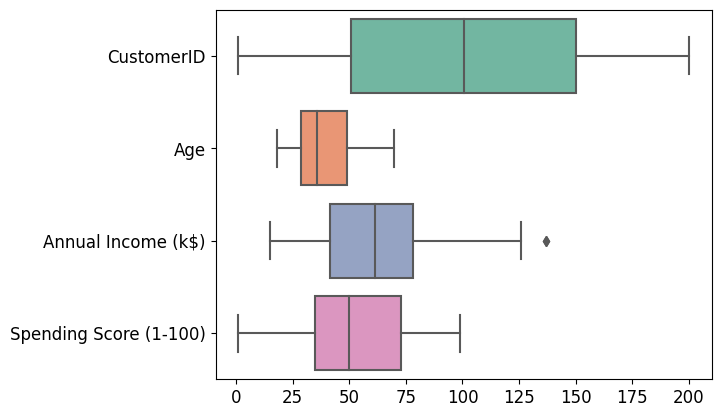

In [8]:
#create the plot
ax = sns.boxplot(data = data[['CustomerID','Age','Annual Income (k$)',	'Spending Score (1-100)']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
#sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [9]:
type(data.columns)

pandas.core.indexes.base.Index

In [10]:
def cap_data(data):
    """
    Description:
            This function is used to remove outliers
    Parameter:
        data : Imported dataset
    Return:
            Returns the data without outliers
    """
    for col in data.columns:
        if col== 'Annual Income (k$)':
            print("capping the ",col)
            if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
                percentiles = data[col].quantile([0.0,0.92]).values
                data[col][data[col] <= percentiles[0]] = percentiles[0]
                data[col][data[col] >= percentiles[1]] = percentiles[1]
            else:
                data[col]=data[col]
    return data

data=cap_data(data)

capping the  Annual Income (k$)


C:\Users\Asus\AppData\Local\Temp\ipykernel_25652\632582593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_25652\632582593.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


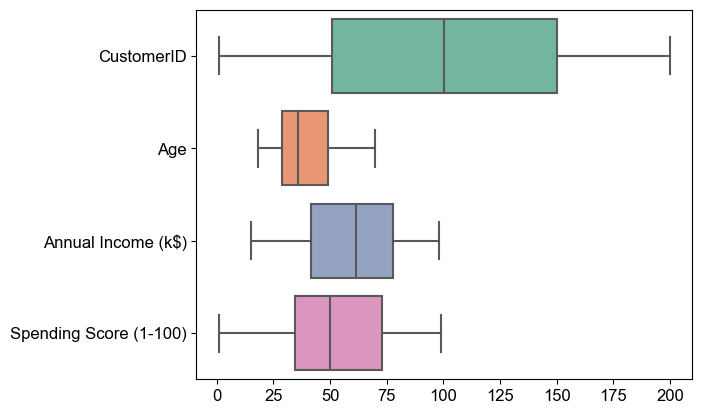

In [11]:
#create the plot

ax = sns.boxplot(data = data[['CustomerID','Age','Annual Income (k$)',	'Spending Score (1-100)']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Feature Scaling

In [12]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(data[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)'])
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.012037,0.051020
3,0.012037,0.775510
4,0.024073,0.397959


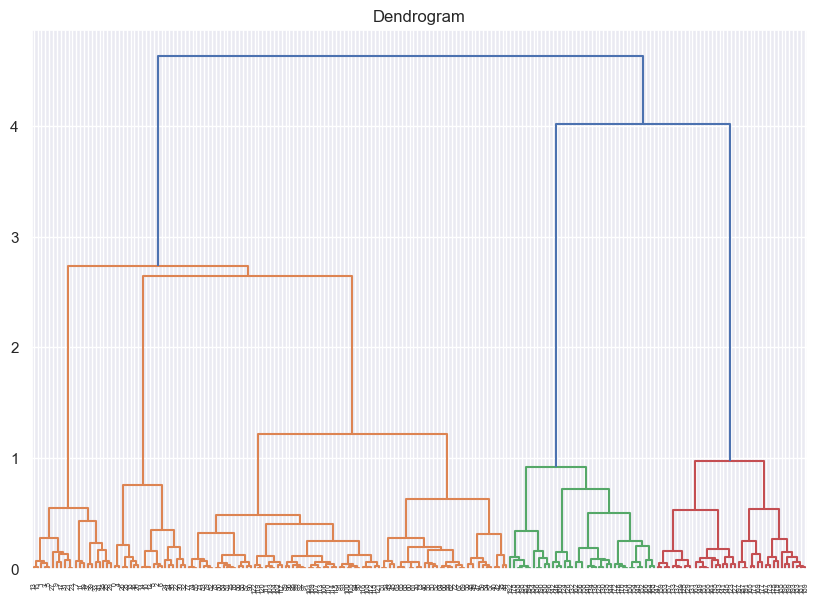

In [13]:
#Dendrogram plot
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(df_scale, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

In [14]:
cluster_ea = AgglomerativeClustering(n_clusters=5, linkage='ward',affinity='euclidean')

c:\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


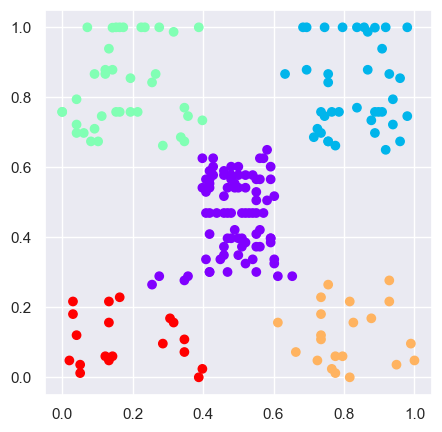

In [15]:
# Visualizing the clustering
plt.figure(figsize =(5, 5))
plt.scatter(df_scale['Spending Score (1-100)'], df_scale['Annual Income (k$)'], c = cluster_ea.fit_predict(df_scale),cmap='rainbow')
plt.show()

### The Silhouette Score

In [16]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
    +str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.34311989994832
Silhouette score for k(clusters) = 3 is 0.478354978487532
Silhouette score for k(clusters) = 4 is 0.5064308887344715
Silhouette score for k(clusters) = 5 is 0.5738711472636652


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 6 is 0.4919303293255834
Silhouette score for k(clusters) = 7 is 0.47094932040833826
Silhouette score for k(clusters) = 8 is 0.4606038348713839


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.45606509162786224
Silhouette score for k(clusters) = 10 is 0.45930736022067686
Silhouette score for k(clusters) = 11 is 0.41685216970610056
Silhouette score for k(clusters) = 12 is 0.4152123714856258


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
